# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set() # Plot styling
from seaborn import heatmap
import math
from tqdm.notebook import tqdm
import random

In [ ]:
def increment(row):
  return row + 1

def multiply_row(row, amount):
  return row * amount

def clean_data(data, skip):
  extinct = []
  counts = np.zeros((5,))
  for i in range(0, len(data), skip):
    found = False
    for k in range(skip):
      if (not found) and (not np.all((data[i+k] > 0.000000001))):
        counts[k] += 1
        extinct.append(round(i/skip))
        found = True
  print(counts)
  return extinct

# Load Data

Loading Model 0...


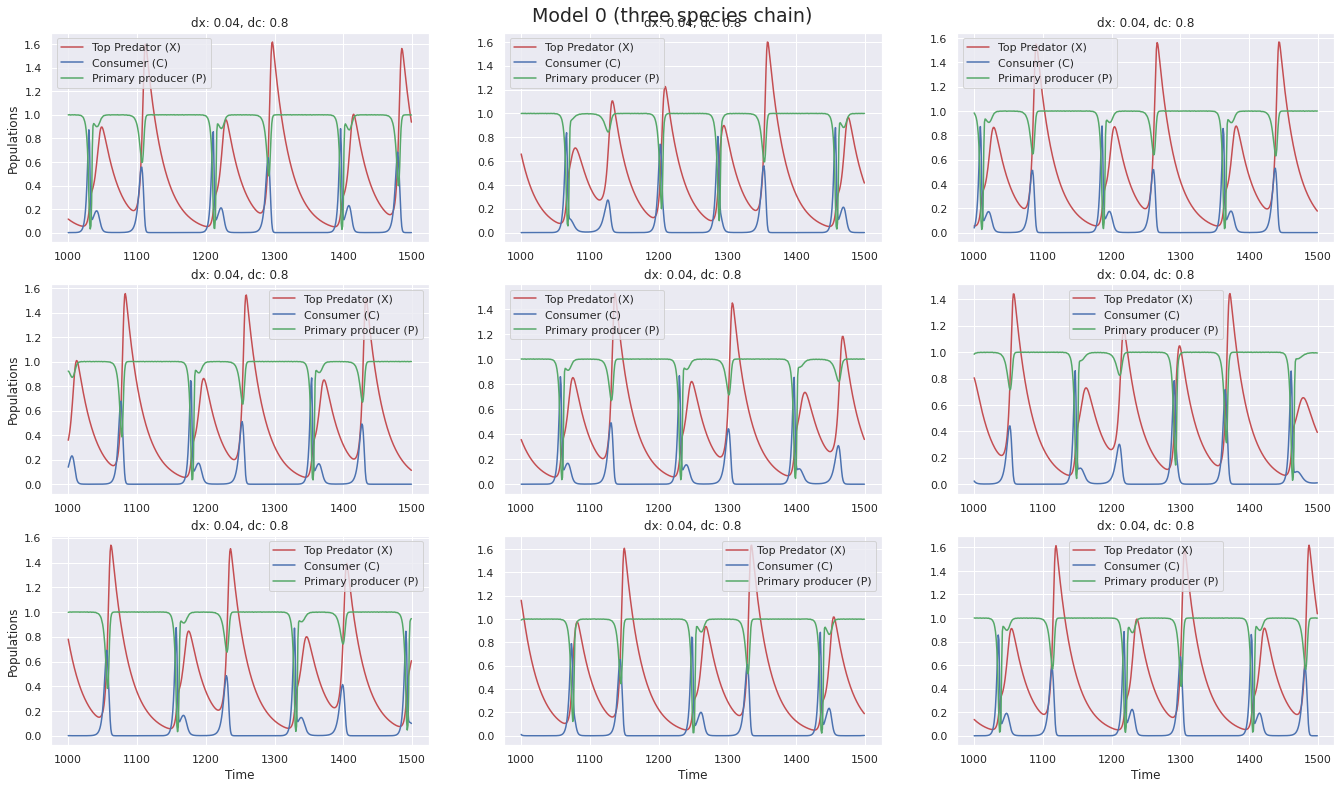

data_x0.shape: (1200, 3000)
data_y0.shape: (1200,)
parameters0.shape: (400, 2)

Cleaning the data
[ 0. 21.  0.  0.  0.]
0.0525 of the populations went extinct for model 0
data_x0.shape: (1137, 3000)
data_y0.shape: (1137,)
parameters0.shape: (379, 2)


In [ ]:
print("Loading Model 0...")
data_x0 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_x_0_new.npy')
data_y0 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_y_0_new.npy')
parameters0 = np.load('/content/drive/MyDrive/Food-Web-Project/Params/0_new.npy')
# data_x0 = data_x0.reshape((data_x0.shape[0], data_x0.shape[1], 1))
 
# display
# start = 0
# end = data_x0.shape[1]
start = 1000
end = 1500
time_frame = np.array(range(start, end))

fig = plt.figure(figsize=(23, 12))
rows = 3
index = 0
for x in range(rows):
  for i in range(1, 4):
    ax = fig.add_subplot(rows, 3, (x*3) + i)
    plt.plot(time_frame, data_x0[index][start:end], 'r', label="Top Predator (X)")
    plt.plot(time_frame, data_x0[index+1][start:end], label="Consumer (C)")
    plt.plot(time_frame, data_x0[index+2][start:end], 'g', label="Primary producer (P)")
    plt.legend()
    plt.title('dx: ' + str(round(parameters0[round(index/3)][0], 2)) + ', dc: ' + str(round(parameters0[round(index/3)][1], 2)))
    # plt.ylim(0, 2)
    if i == 1:
      plt.ylabel("Populations")
    if x == rows - 1:
      plt.xlabel("Time")
    index += 3
  index += 90
fig.subplots_adjust(top=.95)
plt.suptitle('Model 0 (three species chain)', fontsize=19)
plt.show()

print("data_x0.shape:", data_x0.shape)
print("data_y0.shape:", data_y0.shape)
print("parameters0.shape:", parameters0.shape)

print("\nCleaning the data")
extinct = clean_data(data_x0, 3)
print(round(len(extinct)/len(parameters0), 4), "of the populations went extinct for model 0")

parameters0 = np.delete(parameters0, extinct, axis=0)
extinct1 = np.apply_along_axis(multiply_row, 0, extinct, 3)
extinct2 = np.apply_along_axis(increment, 0, extinct1)
extinct3 = np.apply_along_axis(increment, 0, extinct2)
extinct = np.concatenate((extinct1, extinct2, extinct3))
data_x0 = np.delete(data_x0, extinct, axis=0)
data_y0 = np.delete(data_y0, extinct, axis=0)

print("data_x0.shape:", data_x0.shape)
print("data_y0.shape:", data_y0.shape)
print("parameters0.shape:", parameters0.shape)

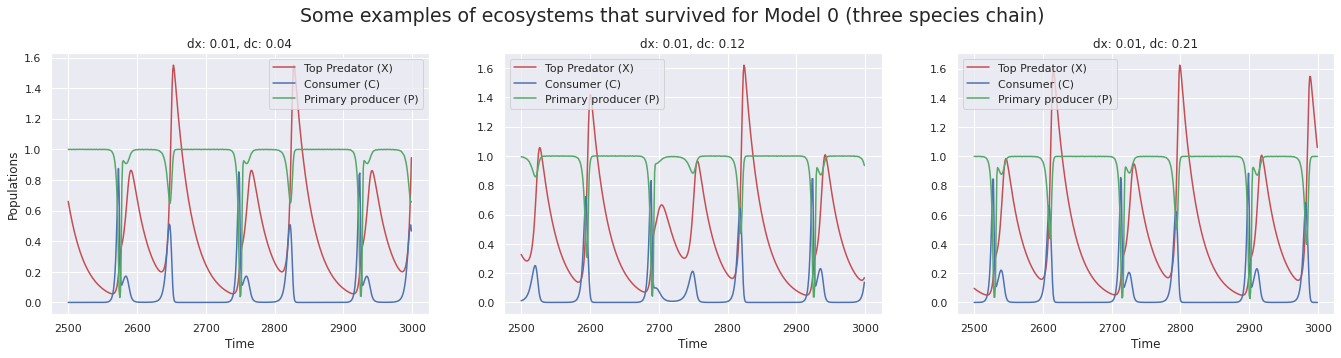

In [ ]:
# start = 0
# end = data_x0.shape[1]
start = 2500
end = 3000
time_frame = np.array(range(start, end))

fig = plt.figure(figsize=(23, 5))
rows = 1
index = 0
for x in range(rows):
  for i in range(1, 4):
    ax = fig.add_subplot(rows, 3, (x*3) + i)
    plt.plot(time_frame, data_x0[index][start:end], 'r', label="Top Predator (X)")
    plt.plot(time_frame, data_x0[index+1][start:end], label="Consumer (C)")
    plt.plot(time_frame, data_x0[index+2][start:end], 'g', label="Primary producer (P)")
    plt.legend()
    plt.title('dx: ' + str(round(parameters0[round(index/3)][0], 2)) + ', dc: ' + str(round(parameters0[round(index/3)][1], 2)))
    # plt.setp(ax.get_xticklabels(), visible=False)
    # plt.ylim(0, 2)
    if i == 1:
      plt.ylabel("Populations")
    if x == rows - 1:
      plt.xlabel("Time")
    index += 3
fig.subplots_adjust(top=.85)
plt.suptitle('Some examples of ecosystems that survived for Model 0 (three species chain)', fontsize=19)
plt.show()

In [ ]:
max_value = np.max(data_x0)
round(100 * max_value / (max_value + 0.01))

99

In [ ]:
num_bins = 100
y_bins = np.linspace(0, 1.65, num_bins)

In [ ]:
data_x_encoded = np.zeros((parameters0.shape[0], 1000, 3*num_bins))
data_x_encoded.shape

(215, 1000, 300)

In [ ]:
max_value = np.max(data_x0) + 0.01
for i in range(0, len(data_x0), 3):
  for k in range(3):
    for t in range(2000, 3000):
      value = data_x0[i + k][t] 
      index = round(num_bins * value / max_value)
      data_x_encoded[round(i/3)][t-2000][(index * 3) + k] = 1

# data_x_encoded[0][0]
# data_x_encoded_rehaped = data_x_encoded.reshape((parameters0.shape[0], 2000, num_bins, 3))[0][0]

Text(0.5, 1.0, 'Hot Encoded Data')

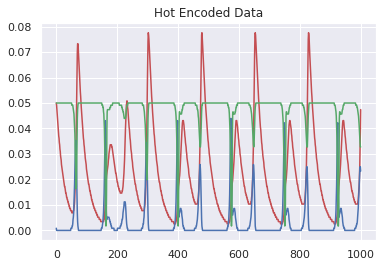

In [ ]:
time_series1 = np.zeros((data_x_encoded.shape[1], ))
time_series2 = np.zeros((data_x_encoded.shape[1], ))
time_series3 = np.zeros((data_x_encoded.shape[1], ))

for i, thing in enumerate(data_x_encoded[0]):
  row1 = thing[::3]
  row2 = thing[1::3]
  row3 = thing[2::3]
  time_series1[i] = np.argmax(row1) * max_value / (2 * data_x_encoded.shape[1])
  time_series2[i] = np.argmax(row2) * max_value / (2 * data_x_encoded.shape[1])
  time_series3[i] = np.argmax(row3) * max_value / (2 * data_x_encoded.shape[1])

t = np.array(range(data_x_encoded.shape[1]))

plt.plot(t, time_series1, 'r')
plt.plot(t, time_series2, 'b')
plt.plot(t, time_series3, 'g')
plt.title("Hot Encoded Data")

In [ ]:
data_x_random = np.zeros((parameters0.shape[0], 1000, 3*num_bins))
data_x_random.shape

(215, 1000, 300)

In [ ]:
max_value_cap = np.max(data_x0) + 0.01
max_value = np.max(data_x0)
for i in range(0, len(data_x0), 3):
  for k in range(3):
    for t in range(2000, 3000):
      value = random.random() * max_value
      index = round(num_bins * value / max_value_cap)
      data_x_random[round(i/3)][t-2000][(index * 3) + k] = 1

# data_x_random[0][0]

Text(0.5, 1.0, 'Totally Random Data')

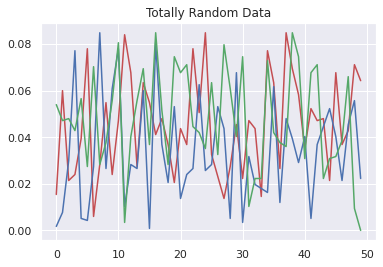

In [ ]:
time_series1 = np.zeros((data_x_random.shape[1], ))
time_series2 = np.zeros((data_x_random.shape[1], ))
time_series3 = np.zeros((data_x_random.shape[1], ))

for i, thing in enumerate(data_x_random[0]):
  row1 = thing[::3]
  row2 = thing[1::3]
  row3 = thing[2::3]
  time_series1[i] = np.argmax(row1) * max_value / (2 * data_x_random.shape[1])
  time_series2[i] = np.argmax(row2) * max_value / (2 * data_x_random.shape[1])
  time_series3[i] = np.argmax(row3) * max_value / (2 * data_x_random.shape[1])

t = np.array(range(data_x_random.shape[1]))

end = 50
plt.plot(t[:end], time_series1[:end], 'r')
plt.plot(t[:end], time_series2[:end], 'b')
plt.plot(t[:end], time_series3[:end], 'g')
plt.title("Totally Random Data")

In [ ]:
# combine data with random
Y1 = np.repeat([1], len(parameters0))
Y2 = np.repeat([0], len(parameters0))
data_x = np.vstack((data_x_encoded, data_x_random))
data_y = np.concatenate((Y1, Y2))
# data_x = np.copy(data_x_encoded)
# data_y = np.copy(Y1)
print("data_x.shape:", data_x.shape)
print("data_y.shape:", data_y.shape)

data_x.shape: (430, 1000, 300)
data_y.shape: (430,)


# Prepare data for machine learning

In [ ]:
# target_values = np.unique(data_y)
# print("target_values:", target_values)

# print("\nhot encoding... \n")
# data_y_encoded = np.zeros((data_x0.shape[0], 2))
# for i in range(0, data_y0.shape[0], 3):
#   # separate by food web
#   # data_y_encoded[i][data_y[i] - 2] = 1

#   # separate by carnivore, herbivore, plants
#   # data_y_encoded[i][0] = 1
#   # data_y_encoded[i+1][1] = 1
#   # data_y_encoded[i+2][2] = 1

#   # separate by connectivity
#   if data_y0[i] == 2:
#     data_y_encoded[i][0] = 1
#     data_y_encoded[i+1][1] = 1
#     data_y_encoded[i+2][2] = 1
#   else:
#     data_y_encoded[i][3] = 1
#     data_y_encoded[i+1][4] = 1
#     data_y_encoded[i+2][5] = 1
    

# print("data_y_encoded.shape:", data_y_encoded.shape)
# print("\nhot encoding looks like: \n", data_y_encoded[0:6])

print("\nSplitting into train and test sets... \n")

X, X_test, Y, Y_test = train_test_split(data_x, data_y, test_size=0.01)

print("X.shape:", X.shape)
print("X_test.shape:", X_test.shape)
print("Y.shape:", Y.shape)
print("Y_test.shape:", Y_test.shape)

print("\nshuffled target values look like: \n", Y[0:10])


Splitting into train and test sets... 

X.shape: (425, 1000, 300)
X_test.shape: (5, 1000, 300)
Y.shape: (425,)
Y_test.shape: (5,)

shuffled target values look like: 
 [1 1 0 0 0 1 0 1 1 0]


# machine learning

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout, LSTM
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
import keras

# define the model
model = Sequential()
model.add(Conv1D(1, 100, padding='same', activation="relu"))

model.add(MaxPooling1D(2))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X, Y, validation_split=0.2, epochs=20)

result = model.evaluate(X_test, Y_test)
# model.summary()

Epoch 1/20
11/11 [==============================] - 2s 102ms/step - loss: 0.5804 - accuracy: 0.5754 - val_loss: 0.3617 - val_accuracy: 1.0000
Epoch 2/20
11/11 [==============================] - 1s 78ms/step - loss: 0.3021 - accuracy: 1.0000 - val_loss: 0.3111 - val_accuracy: 1.0000
Epoch 3/20
11/11 [==============================] - 1s 78ms/step - loss: 0.2509 - accuracy: 1.0000 - val_loss: 0.2629 - val_accuracy: 1.0000
Epoch 4/20
11/11 [==============================] - 1s 80ms/step - loss: 0.2275 - accuracy: 1.0000 - val_loss: 0.2221 - val_accuracy: 1.0000
Epoch 5/20
11/11 [==============================] - 1s 78ms/step - loss: 0.2006 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 1.0000
Epoch 6/20
11/11 [==============================] - 1s 79ms/step - loss: 0.1558 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 1.0000
Epoch 7/20
11/11 [==============================] - 1s 79ms/step - loss: 0.1366 - accuracy: 1.0000 - val_loss: 0.1467 - val_accuracy: 1.0000
Epoch 8/20
1

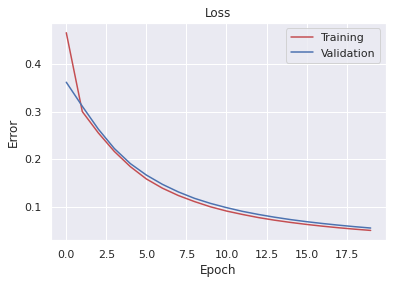

In [ ]:
accuracy = np.array(hist.history['accuracy'])
val_accuracy = np.array(hist.history['val_accuracy'])
error = np.array(hist.history['loss'])

plt.plot(hist.epoch, error, 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

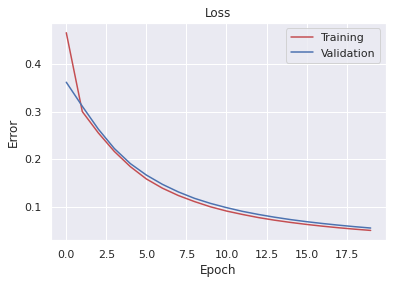

In [ ]:
accuracy = np.array(hist.history['accuracy'])
val_accuracy = np.array(hist.history['val_accuracy'])
error = np.array(hist.history['loss'])

plt.plot(hist.epoch, error, 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

# hyperparameter tuning

In [ ]:
best = 1
results = np.zeros((9, ))
index = 0
for filter_size in range(10, 100, 10):
  total = 0
  for i in range(3):
    model = Sequential()
    model.add(Conv1D(1, filter_size, padding='same', activation="relu"))

    model.add(MaxPooling1D(2))
    model.add(Dropout(0.7))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X, Y, validation_split=0.2, epochs=10, verbose=0)

    result = model.evaluate(X_test, Y_test)
    total += result[0]
  total = total / 3
  results[index] = total
  index += 1
  if total < best:
    best = total
    print("loss:", best)
    print("filter size:", filter_size)

KeyboardInterrupt: ignored

Text(0, 0.5, 'Loss')

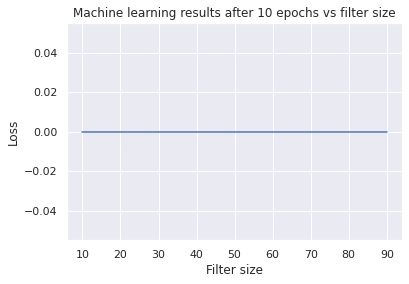

In [ ]:
filter_sizes = np.array(range(10, 100, 10)) 
plt.plot(filter_sizes, results)
plt.title("Machine learning results after 10 epochs vs filter size")
plt.xlabel("Filter size")
plt.ylabel("Loss")

In [ ]:
result[1]

[0.11491416394710541, 1.0]

# look at filter

Convolution parameter shape: (100, 300)


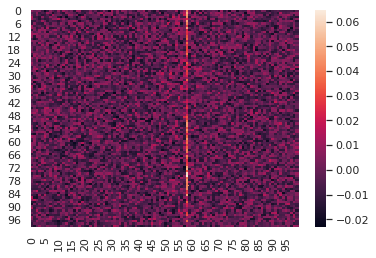

In [ ]:
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))
print(weights)

# heatmap(np.transpose(weights[:,2::3,0]))
# weights = weights[:,:,0]
heatmap(weights[:,2::3])

Convolution parameter shape: (50, 300)


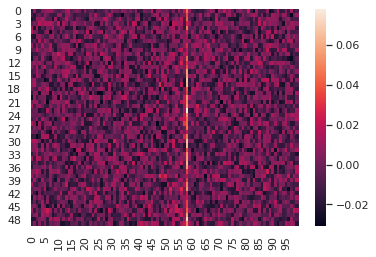

In [ ]:
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))
# print(weights)

# heatmap(np.transpose(weights[:,2::3,0]))
# weights = weights[:,2::3,0]
heatmap(weights[:,2::3])

In [ ]:
# for i in range(0, 100, 10):
#   heatmap(weights[i].reshape(round(weights[i].shape[0]/3), 3))
#   plt.show()

(300,)
(100,)


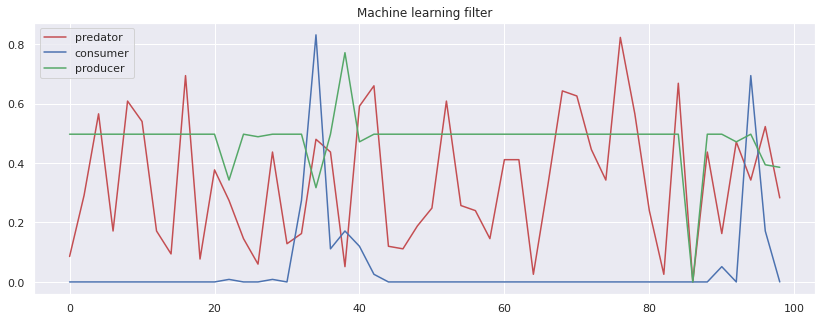

In [ ]:
time_series1 = np.zeros((weights.shape[0], ))
time_series2 = np.zeros((weights.shape[0], ))
time_series3 = np.zeros((weights.shape[0], ))
first = weights[1]
print(first.shape)
first = first[::3]
print(first.shape)

for i, thing in enumerate(weights):
  row1 = thing[::3]
  row2 = thing[1::3]
  row3 = thing[2::3]
  time_series1[i] = np.argmax(row1) * max_value / (2 * weights.shape[0])
  time_series2[i] = np.argmax(row2) * max_value / (2 * weights.shape[0])
  time_series3[i] = np.argmax(row3) * max_value / (2 * weights.shape[0])
  # time_series1[i] = np.argmin(row1) * max_value / (2 * weights.shape[0])
  # time_series2[i] = np.argmin(row2) * max_value / (2 * weights.shape[0])
  # time_series3[i] = np.argmin(row3) * max_value / (2 * weights.shape[0])

np.argmax(first)

t = np.array(range(0, weights.shape[0], 2))

plt.figure(figsize=(14, 5))
plt.plot(t, time_series1[::2], 'r', label="predator")
plt.plot(t, time_series2[::2], 'b', label="consumer")
plt.plot(t, time_series3[::2], 'g', label="producer")
plt.title("Machine learning filter")
plt.legend()

(300,)
(100,)


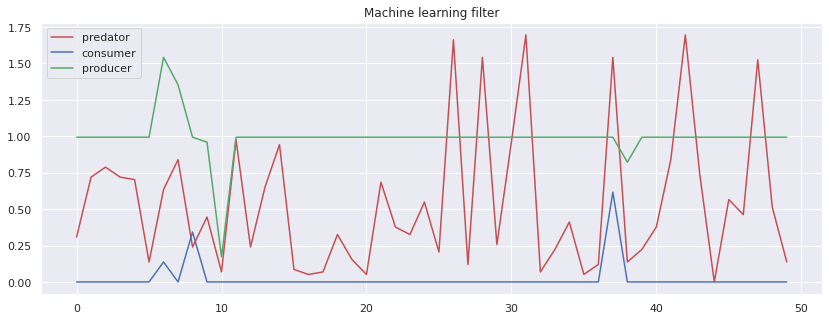

In [ ]:
time_series1 = np.zeros((weights.shape[0], ))
time_series2 = np.zeros((weights.shape[0], ))
time_series3 = np.zeros((weights.shape[0], ))
first = weights[1]
print(first.shape)
first = first[::3]
print(first.shape)

for i, thing in enumerate(weights):
  row1 = thing[::3]
  row2 = thing[1::3]
  row3 = thing[2::3]
  time_series1[i] = np.argmax(row1) * max_value / (2 * weights.shape[0])
  time_series2[i] = np.argmax(row2) * max_value / (2 * weights.shape[0])
  time_series3[i] = np.argmax(row3) * max_value / (2 * weights.shape[0])

np.argmax(first)

t = np.array(range(weights.shape[0]))

plt.figure(figsize=(14, 5))
plt.plot(t, time_series1, 'r', label="predator")
plt.plot(t, time_series2, 'b', label="consumer")
plt.plot(t, time_series3, 'g', label="producer")
plt.title("Machine learning filter")
plt.legend()